In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [4]:
#Plot styling
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib
matplotlib.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True
matplotlib.rcParams['figure.dpi']= 150
matplotlib.rcParams["svg.fonttype"] = "none"
matplotlib.rcParams['figure.figsize'] = [7, 7]
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'figure.autolayout': True})
import seaborn as sns

In [16]:
sns.set(style='whitegrid', font_scale=1.4, rc={"lines.linewidth": 1.8,'lines.markersize': 4.0, 'axes.facecolor': 'white'}, font="serif")

In [6]:
import numpy as np
from szar.counts import ClusterCosmology
from configparser import ConfigParser
from orphics.io import dict_from_section,list_from_config
from szar.clustering import Clustering

def get_cc(ini):
    Config = ConfigParser()
    Config.optionxform=str
    Config.read(ini)
    clttfile = Config.get('general','clttfile')
    constDict = dict_from_section(Config,'constants')

    fparams = {}
    for (key, val) in Config.items('params'):
        if ',' in val:
            param, step = val.split(',')
            fparams[key] = float(param)
        else:
            fparams[key] = float(val)

    cc = ClusterCosmology(fparams,constDict,clTTFixFile=clttfile)
    return cc

In [23]:
params = np.load(
    'userdata/s4/prefisher/S4-1.0-CDT_grid-owl2_v1.1_params_2019-06-17-11-42-23-EDT_1e-2photoz_abias.npy'
)

inifile = 'input/pipeline.ini'
expname = 'S4-1.0-CDT'
gridname = 'grid-owl2'
version = '1.1'

cc = get_cc(inifile)

clst = Clustering(inifile, expname, gridname, version, cc)

szprop = clst.SZProp

ns_s4 = clst.HMF.nz()
ns_sz_s4 = clst.HMF.nz_sz(szprop)

N_clusts_s4 = clst.HMF.N_of_z()
N_clusts_sz_s4 = clst.HMF.N_of_z_SZ(0.4, szprop)

zs_s4 = clst.HMF.zarr

data/cltt_lensed_Feb18.txt
updating


In [26]:
params = np.load(
    'userdata/so/prefisher/SO-v3-base-40_grid-owl2_v1.1_fish_factor_2019-06-17-11-12-18-EDT_1e-2photoz_abias.npy'
)

inifile = 'input/pipeline.ini'
expname = 'SO-v3-base-40'
gridname = 'grid-owl2'
version = '1.1'

cc = get_cc(inifile)

clst = Clustering(inifile, expname, gridname, version, cc)

szprop = clst.SZProp

ns_so_base = clst.HMF.nz()
ns_sz_so_base = clst.HMF.nz_sz(szprop)

N_clusts_so_base = clst.HMF.N_of_z()
N_clusts_sz_so_base = clst.HMF.N_of_z_SZ(0.4, szprop)

zs_so_base = clst.HMF.zarr

data/cltt_lensed_Feb18.txt
updating


In [27]:
params = np.load(
    'userdata/so/prefisher/SO-v3-goal-40_grid-owl2_v1.1_steps_2019-06-17-11-28-20-EDT_1e-2photoz_abias.npy'
)

inifile = 'input/pipeline.ini'
expname = 'SO-v3-goal-40'
gridname = 'grid-owl2'
version = '1.1'

cc = get_cc(inifile)

clst = Clustering(inifile, expname, gridname, version, cc)

szprop = clst.SZProp

ns_so_goal = clst.HMF.nz()
ns_sz_so_goal = clst.HMF.nz_sz(szprop)

N_clusts_so_goal = clst.HMF.N_of_z()
N_clusts_sz_so_goal = clst.HMF.N_of_z_SZ(0.4, szprop)

zs_so_goal = clst.HMF.zarr

data/cltt_lensed_Feb18.txt
updating


/Users/dylan/Development/tsz_18/szar/szar-env/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/dylan/Development/tsz_18/szar/szar-env/lib/python3.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


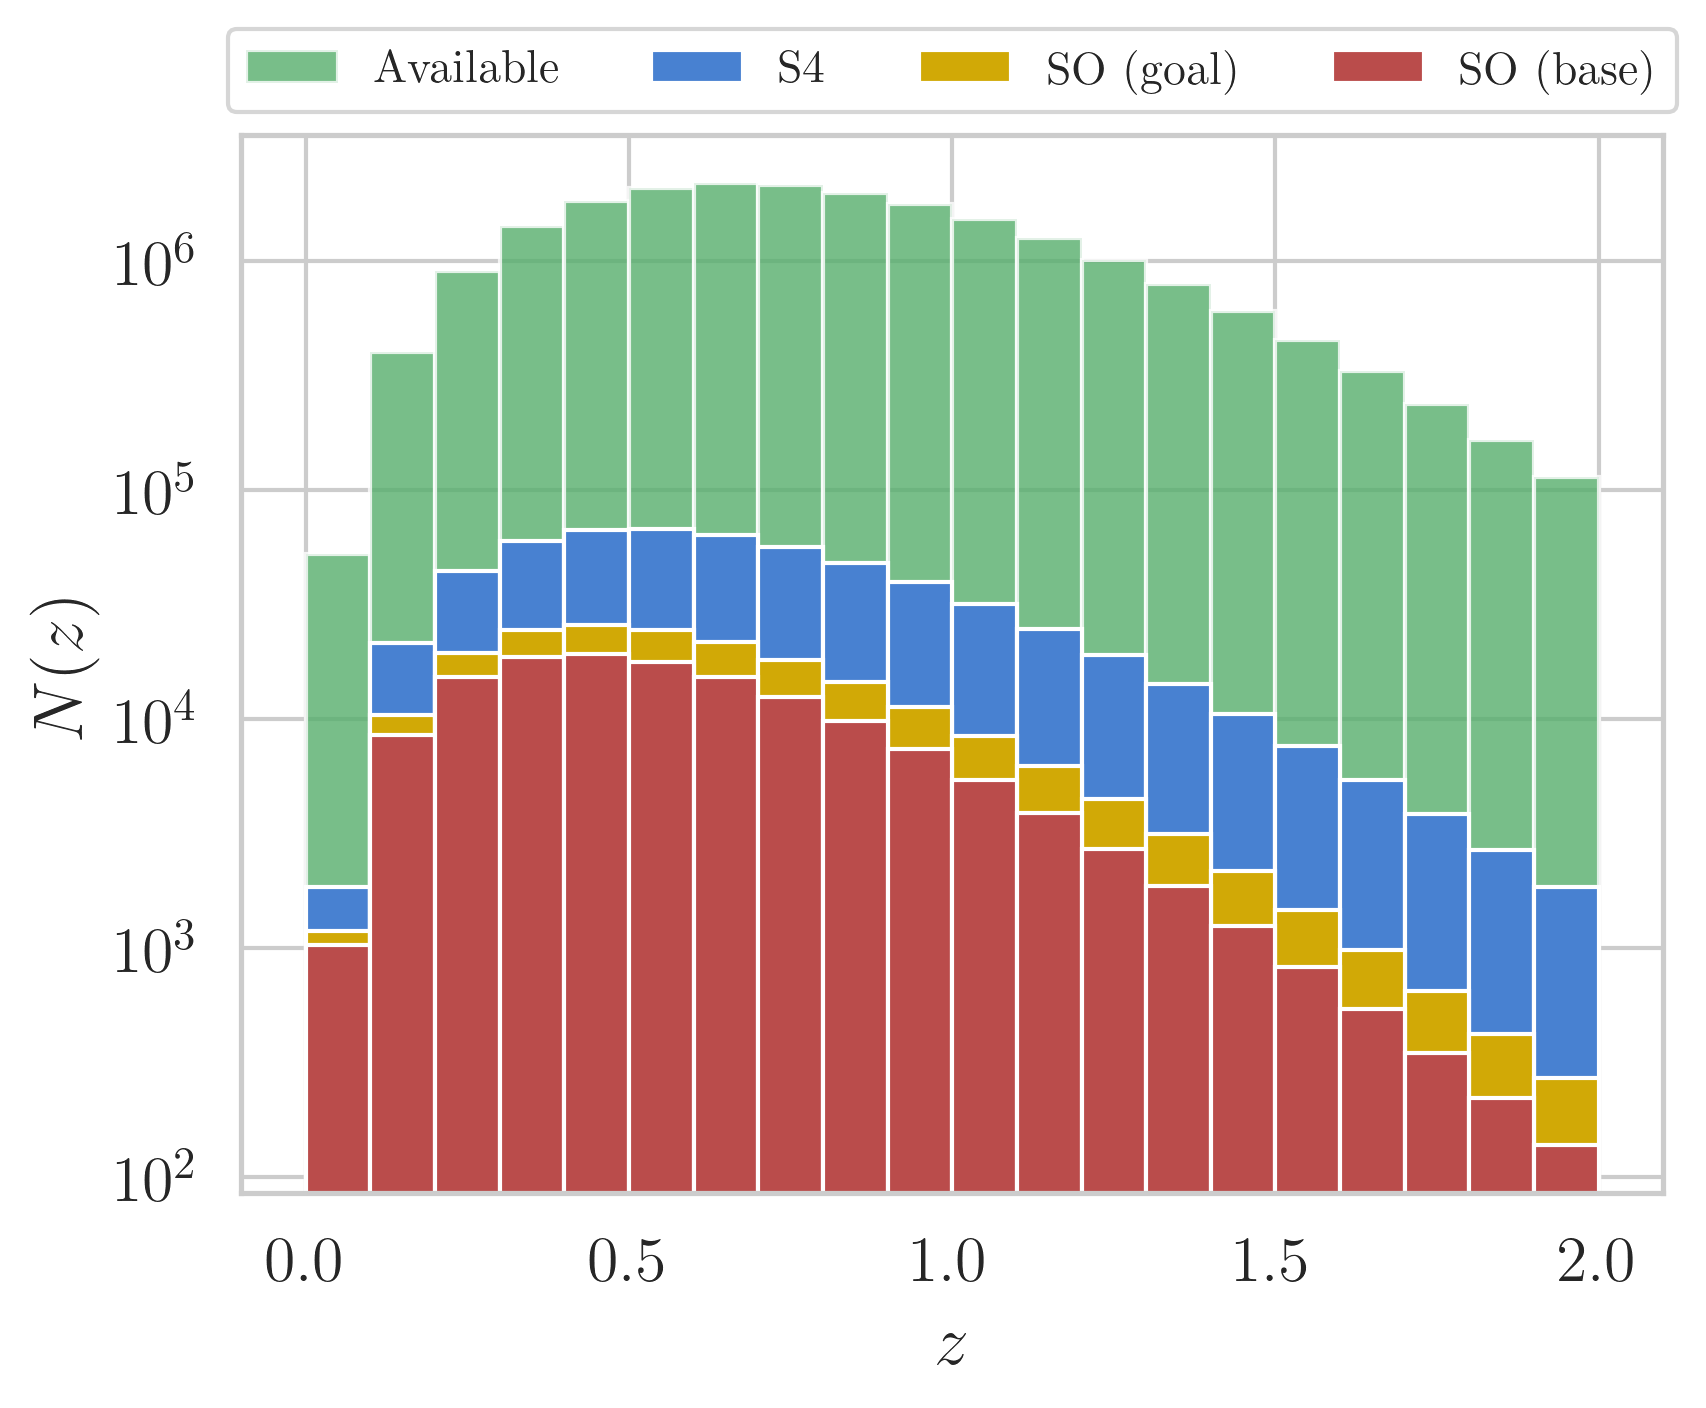

In [97]:
colors = ["#ba4c4b",
"#d1a906",
"#4881d1",
"#56ae6c"]

plt.bar(zs_so_base, N_clusts_so_base, width=0.1, label='Available', color=colors[3], alpha=0.8)
plt.bar(zs_s4, N_clusts_sz_s4, width=0.1, label='S4', color=colors[2])
plt.bar(zs_so_goal, N_clusts_sz_so_goal, width=0.1, label='SO (goal)', color=colors[1])
plt.bar(zs_so_base, N_clusts_sz_so_base, width=0.1, label='SO (base)', color=colors[0])

plt.yscale('log')

plt.xlabel(r'$z$')
plt.ylabel(r'$N(z)$')

plt.legend(loc='lower center', bbox_to_anchor=[0.5, 1], ncol=4, fontsize=11)
fig = plt.gcf()
fig.set_size_inches(6, 5)

plt.savefig('num_clusters.pdf')

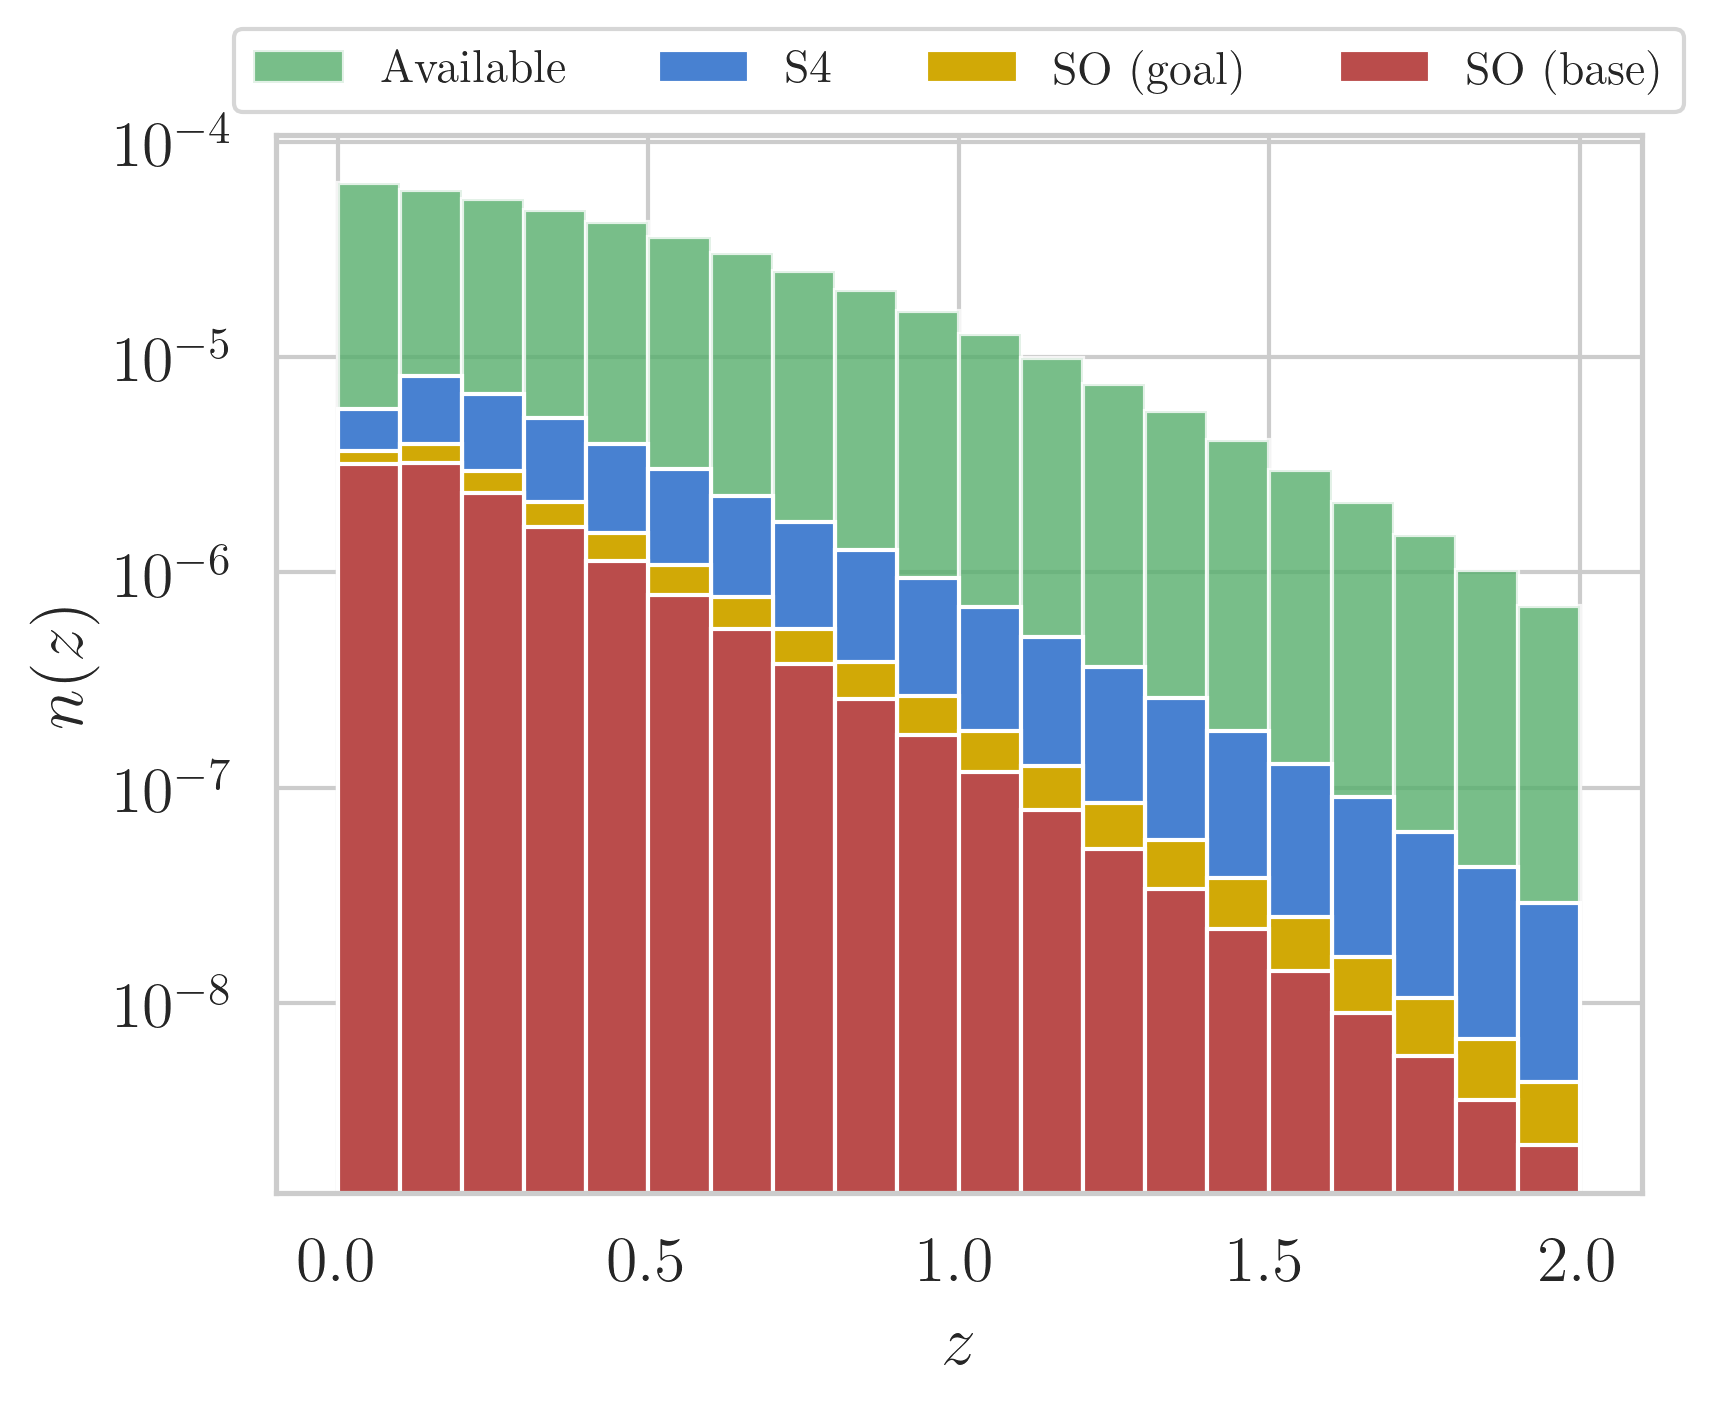

In [94]:
plt.bar(zs_so_base, ns_so_base, width=0.1, label='Available', color=colors[3], alpha=0.8)
plt.bar(zs_s4, ns_sz_s4, width=0.1, label='S4', color=colors[2])
plt.bar(zs_so_goal, ns_sz_so_goal, width=0.1, label='SO (goal)', color=colors[1])
plt.bar(zs_so_base, ns_sz_so_base, width=0.1, label='SO (base)', color=colors[0])

plt.yscale('log')

plt.xlabel(r'$z$')
plt.ylabel(r'$n(z)$')

plt.legend(loc='lower center', bbox_to_anchor=[0.5, 1], ncol=4, fontsize=11)
fig = plt.gcf()
fig.set_size_inches(6, 5)